In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Probability

Let's explore the probability of any two people having the same birthday out of a group of people.

First:  what is the probability of a person having a specific birthday out of the year?

Assume to simplfy the problem:  The year is 365 days and that there is a equally likely to to be on any of the days, independently from the other people in the group.  

In [2]:
1/365

0.0027397260273972603

What is probability of a specific birthday out of 1 million people?

Let's set up a simulation of 1,000,000 people in a room and look at the distribution of their birthdays, numbering the days as 1 to 365.

In [3]:
#  import the uniform discrete function
from scipy.stats import randint
# 1 million people's birthdays
randomvarUniform_oneM=randint.rvs(1,366,size=1000000)
#print(randomvarUniform_oneM)

<AxesSubplot:ylabel='Count'>

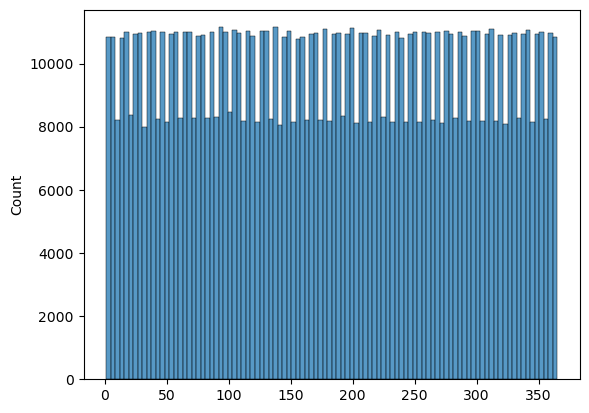

In [4]:
sns.histplot(randomvarUniform_oneM,stat='count',bins='auto')

<AxesSubplot:ylabel='Density'>

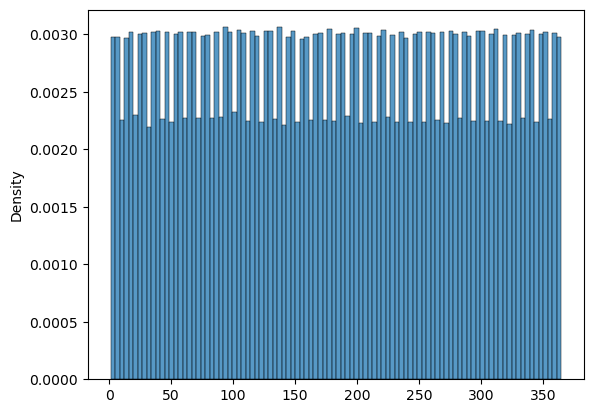

In [5]:
sns.histplot(randomvarUniform_oneM,stat='density',bins='auto')

The law of large numbers (LLN) is a theorem in probability that describes the result of performing the same experiment a large number of times. The average of the results obtained from a large number of trials should be close to the expected value and tends to become closer to the expected value as more trials are performed.  The LLN is important because it guarantees stable long-term results for the averages of random events.

This looks pretty close to the long-run probability that we found using 1/365 = 0.0027

Now let's look at the probability using 50 people.  Since this is not a large number for our sample of the true distribution, we will probably have a imperfect understanding of the underlying probability, but it will be our best guess.

In [6]:
# 50 people's birthdays
randomvarUniform_fifty=randint.rvs(1,366,size=50)
print(randomvarUniform_fifty)

[ 39 236 345 339 314 104 129  88  71 175 251  58 216 116 301 242  46 111
 346 311  88  70  11 277 141 173 126  81 158   7 245 154 221 262  79  73
  62 172 267 331 358 129 309 263 352 168 129 215  19   6]


<AxesSubplot:ylabel='Count'>

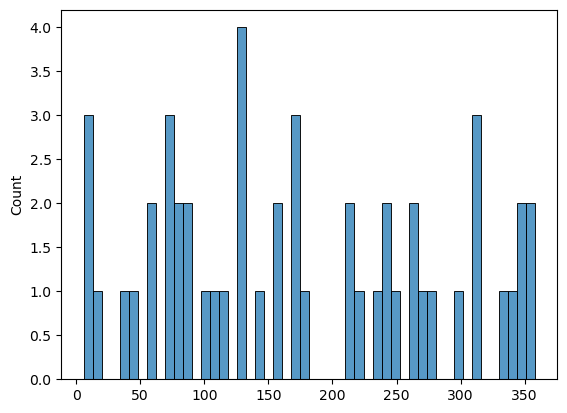

In [7]:
sns.histplot(randomvarUniform_fifty,stat='count',bins=50)

<AxesSubplot:ylabel='Density'>

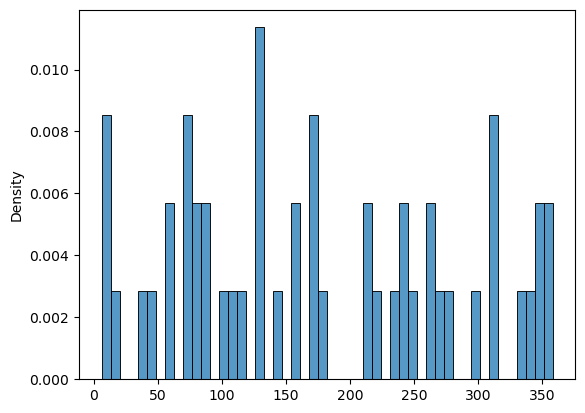

In [8]:
sns.histplot(randomvarUniform_fifty,stat='density',bins=50)

It looks like several people have the same birthday! The empirical probability of having the same birthday is higher than that of having any specific birthday.  Does this suprise you?  This is the foundation of the probability birthday problem: What is the probability of at least 2 people having the same birthday in some group of size n?

Before we find this, let's change the question and ask:  What is the probability of of finding two people in our group of 50 with the same specific birthday? 

Probability of event A (1st Person having birthday on day 1) AND probability of event B (2nd Person having birthday on day 1)?

What is the relevant probability law?  
**Statistically independent events: Use the specific multiplication law of probability.**  

P(1stPerson) = 1/365 = 0.0027  
P(2ndPerson) = 1/365 = 0.0027  

P (A AND B) = P(1stPerson) * P(2ndPerson)= 0.0027 * 0.0027 = 0.0000073

What is the probability of 5 people having the same speicfic birthday?

P(A AND B AND C AND D AND E) = 0.0027^5 = 1.43*e-13
            
These are low chances!  This is what we are generally thinking about for the birthday problem.  

In [9]:
0.0027**5

1.4348907000000003e-13

**Complement Rule**

What is the probability of at least 1 of these 5 people having the specifc birthday?

Because the event of at least 1 person having a specific birthday is mutually exclusive to the event of having no one with the specific birthday, you can use the complement rule to state that P(at least 1 person) = 1 - P(no persons).  The entire probabilities of the event have to add up to 1. 

The probability of no persons in the group of 5 having the specific birthday = (364/365)^5 = (0.997)^5 = 0.986

So the probability of at least 1 person in group of 5 = 1 - P(no persons) = 1 - 0.986 ~ 0.014

**Conditional Probability**

But the birthday problem is asking: What is the probability of at least 2 people having a shared birthday in some group of size n? 

To compute this we can turn to permutations or to conditional probability. 

What is the probability of a 2nd person having a birthday GIVEN that a first person has a specific birthday?  This is a dependent or non-independent event.  This opens up all of the comparisions for each person against each person.

P(2ndPerson|1stPerson) = P(B|A) = $\frac{P(A (AND) B)}{P(A)}$

P(A AND B) = P(A) * P(B|A)

It is easier to find the complement of the probability of no two people in the group have a shared birthday, so invoke the complement rule:      

P(at least 2 people with a shared birthday) = 1 - P(no people with a shared birthday)

P(A AND B) = probability that no 2 people share a birthday

Let's find the probability of no 2 people sharing a birthday out of 5 people.

= P(A) * P(B|A) * P(C|B) * P(D|C) * P(E|D)
= 1 * (365-1)/365 * (365-2)/365 * (365-3)/365 * (365-4)/365 * (365-5)/365  
= 1 * 0.997 * 0.995 * 0.992 * 0.989   
= 0.973

P(at least 2 sharing a birthday in 5 people) = 1 - 0.973 = 0.027

Generalized rule for this problem:  1*(364/365)*(363/365)*...*(365-n+1)/365) 

We can find this generalized form for n=5:

In [10]:
import math
nBDay= 5
BDayParadoxProb=1-((math.factorial(365))/(((365**nBDay) *math.factorial(365-nBDay))))

In [11]:
BDayParadoxProb

0.02713557369979358

And then use it to graph the probabilities a range of n

In [12]:
def BDayParadoxProbi(nBDayi):
    BDayParadoxProbA=[]
    for i in range(1,nBDayi+1):
            BDayParadoxProb=1-((math.factorial(365))/(((365**i) *math.factorial(365-i))))
            BDayParadoxProbA.append(BDayParadoxProb)
            #print(BDayParadoxProbA)
    return BDayParadoxProbA

In [13]:
nBDayi=5
BDayParadoxAA=BDayParadoxProbi(nBDayi)
print(BDayParadoxAA)

[0.0, 0.002739726027397249, 0.008204165884781345, 0.016355912466550326, 0.02713557369979358]


Text(0, 0.5, 'probability')

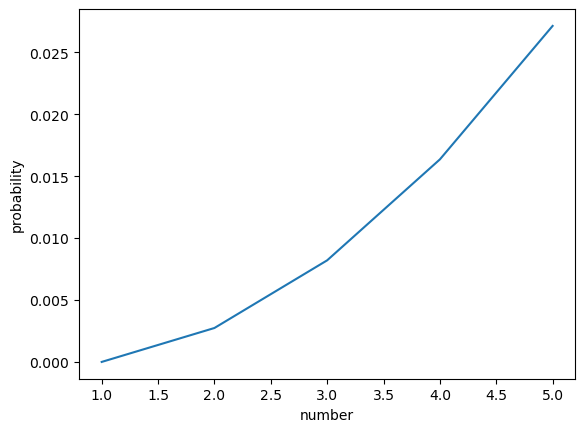

In [15]:
sns.lineplot(x=range(1,nBDayi+1),y=BDayParadoxAA)
plt.xlabel("number")
plt.ylabel("probability")

In [15]:
nBDayi=80
BDayParadoxAA=BDayParadoxProbi(nBDayi)
print(BDayParadoxAA)

[0.0, 0.002739726027397249, 0.008204165884781345, 0.016355912466550326, 0.02713557369979358, 0.040462483649111536, 0.056235703095975365, 0.07433529235166902, 0.09462383388916673, 0.11694817771107768, 0.141141378321733, 0.16702478883806438, 0.19441027523242937, 0.223102512004973, 0.25290131976368635, 0.2836040052528499, 0.31500766529656066, 0.34691141787178936, 0.37911852603153673, 0.41143838358057994, 0.4436883351652058, 0.4756953076625501, 0.5072972343239854, 0.5383442579145288, 0.5686997039694639, 0.598240820135939, 0.626859282263242, 0.6544614723423994, 0.680968537477777, 0.7063162427192686, 0.7304546337286438, 0.7533475278503207, 0.774971854175772, 0.7953168646201543, 0.8143832388747152, 0.8321821063798795, 0.8487340082163846, 0.8640678210821209, 0.878219664366722, 0.891231809817949, 0.9031516114817354, 0.9140304715618692, 0.9239228556561199, 0.9328853685514263, 0.940975899465775, 0.9482528433672547, 0.9547744028332994, 0.9605979728794224, 0.9657796093226765, 0.9703735795779884, 0.

The birthday paradox is that the number of people needed in a group seems low to have a birthday match.  Here we graph a group of 80 and see what the probability of a shared birthday (a match) is.  It turns out that the probability of a shared birthday exceeds 50% (is 50.7%) with a n=23 in a group! 

C:\Users\carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'probability')

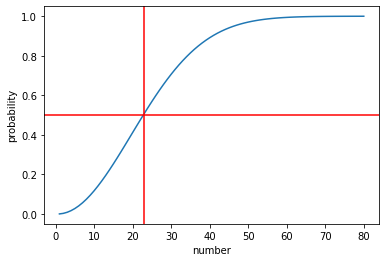

In [16]:
sns.lineplot(range(1,nBDayi+1),BDayParadoxAA)
plt.axhline(y=0.5,color="red")
plt.axvline(x=23,color="red")
plt.xlabel("number")
plt.ylabel("probability")

# Probability in Flow Diagrams or Circuits

![](PicTutorial2CircuitsProb.png)

What is the probability of the circuit working?

P(A)=0.9; P(B)=0.95, P(C)=0.99.  The probability of working are independent of each other.  What is the probability of the circuit working?

Partition the graph into groupings.  The first left column works if any or all of the circuit works; these are the general form of either or occuring (not mutually exclusive).  This is an OR or UNION problem for A.  The second group works if any or all of the circuits work for B.  The circuit then works if the independent A circuit work AND the B cicuit works and the C cicuit works.  

P(A1)=P(A OR A) = P(A) + P(A) - P(A AND A) = 0.9 +0.9 - 0.9 * 0.9 = 0.99
P(A2)= P(A1 OR A) = P(A1) + P(A) - P(A1 AND A)= 0.99 + 0.9 - (.99*.9) = 0.999

P(B1) = P(B OR B) = P(B) + P(B) - P(B AND B) = 0.95 +0.95 - (0.95 * 0.95) = 0.9975

P(C) = 0.99

P(A2 AND B1 AND C) = 0.999 * 0.9975 * 0.99 = 0.9865

You could also calculate the columns with the complement of all of them failing, so that the probability of any of them working in column A is 1-(all of them failing) = 1-(0.1)^3 = 0.999